In [1]:
import torch
import torch.nn as nn

from torch.utils.data import TensorDataset, DataLoader

from common import *

In [2]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
logging.debug('A debug message!')


In [3]:
torch.autograd.set_detect_anomaly(True)
device = "cpu"

In [4]:
# read the data from the "GeneratorInput.txt" file
def read_data(file_name):
    with open(file_name, 'r') as file:
        data = file.readlines()
    return data

raw_data = read_data("GeneratorInput.txt")

datasets = []
y_idx = 0
dataset = None
for line in raw_data:
    if len(line) <= 1:
        datasets.append(dataset.copy())
        y_idx = 0
        dataset = []
        continue
    y_idx += 1
    if dataset is None:
        dataset = []
    for x_idx,char in enumerate(line):
        if char == '0' or char == '1':
            dataset.append((y_idx,x_idx+1, int(char)))
    

In [5]:
data = datasets[6]
X = torch.tensor([list(sublist[:2]) for sublist in data], dtype=torch.float32)
y = torch.tensor([item for sublist in data for item in sublist[2:]], dtype=torch.float32).unsqueeze(1)


#scale the data to be between 0 and 1
# X = X / X.max()
X

tensor([[ 1.,  2.],
        [ 1.,  8.],
        [ 1.,  9.],
        [ 2.,  2.],
        [ 2.,  6.],
        [ 2.,  7.],
        [ 2.,  8.],
        [ 3.,  2.],
        [ 3.,  6.],
        [ 4.,  1.],
        [ 4.,  2.],
        [ 4.,  3.],
        [ 4.,  4.],
        [ 4.,  6.],
        [ 4.,  8.],
        [ 4.,  9.],
        [ 5.,  4.],
        [ 6.,  1.],
        [ 6.,  3.],
        [ 7.,  1.],
        [ 7.,  6.],
        [ 7.,  7.],
        [ 7.,  9.],
        [ 8.,  2.],
        [ 8.,  3.],
        [ 8.,  4.],
        [ 8.,  6.],
        [ 8.,  7.],
        [ 8.,  8.],
        [ 8.,  9.],
        [ 9.,  2.],
        [ 9.,  4.],
        [ 9.,  8.],
        [ 9.,  9.],
        [10.,  2.],
        [10.,  3.],
        [10.,  4.],
        [10.,  7.],
        [10.,  8.]])

# Network1


In [6]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = Network1()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


Epoch [20/200], Loss: 1.1780, Accuracy: 51.28
Epoch [40/200], Loss: 0.3624, Accuracy: 51.28
Epoch [60/200], Loss: 0.2640, Accuracy: 51.28
Epoch [80/200], Loss: 1.0595, Accuracy: 51.28
Epoch [100/200], Loss: 0.1234, Accuracy: 58.97
Epoch [120/200], Loss: 0.5782, Accuracy: 76.92
Epoch [140/200], Loss: 0.4619, Accuracy: 87.18
Epoch [160/200], Loss: 0.2291, Accuracy: 100.00
Epoch [180/200], Loss: 0.0104, Accuracy: 100.00
Epoch [200/200], Loss: 0.5077, Accuracy: 100.00


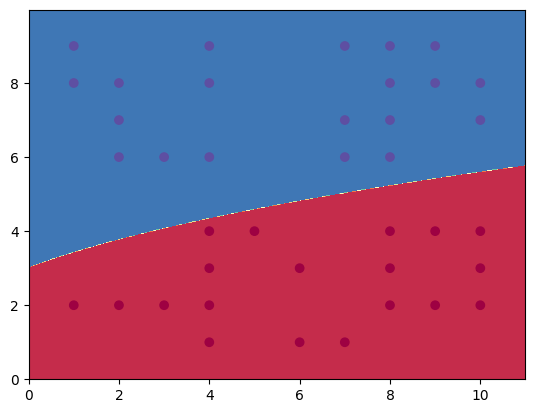

In [7]:

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    

    if accuracy > 0.99:
        print("HOORAY")
        
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
        
plot_decision_boundary(model, X, y) 

# Network 2

In [8]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


model = Network2()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)
total_epochs = 0
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Epoch [20/500] total 20, Loss: 0.3713, Accuracy: 92.31
Epoch [40/500] total 40, Loss: 0.3916, Accuracy: 94.87
Epoch [60/500] total 60, Loss: 0.0077, Accuracy: 94.87
Epoch [80/500] total 80, Loss: 0.1722, Accuracy: 97.44
Epoch [100/500] total 100, Loss: 0.0203, Accuracy: 97.44
Epoch [120/500] total 120, Loss: 0.0572, Accuracy: 97.44
Epoch [140/500] total 140, Loss: 0.0733, Accuracy: 97.44
Epoch [160/500] total 160, Loss: 0.0151, Accuracy: 97.44
Epoch [180/500] total 180, Loss: 0.0253, Accuracy: 97.44
HOORAY


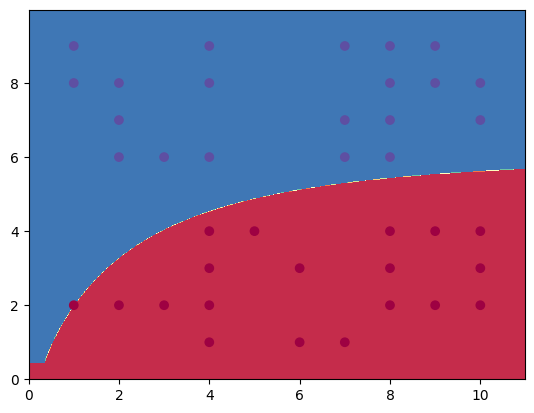

In [9]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        # print(f"y_pred is {y_pred} and y_batch is {y_batch}")
        y_pred = model(X_batch)
        
        # replace y_pred nan with 0
        # y_pred = torch.nan_to_num(y_pred)

        logging.debug(f"y_pred is {y_pred} and y_batch is {y_batch}")
        
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()

        loss.backward()
        # clip the gradients
        # for param in model.parameters():
        #     param.grad.data.clamp_(-100, 100)

        optimizer.step()

        for name, param in model.named_parameters(): 
            logging.debug(f"{name} has gradient {param.grad}")

    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    total_epochs += 1
    

    if accuracy > 0.99:
        print("HOORAY")
        break
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] total {total_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
    

plot_decision_boundary(model, X, y)

In [ ]:
# print all parameters of the model
for name, param in model.named_parameters():
    print(f"{name} has shape {param.shape} and value {param}")

# print model gradients
for name, param in model.named_parameters(): 
    print(f"{name} has gradient {param.grad}")
    